In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [72]:
dataset=pd.read_csv("Mall_Customers.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [73]:
x=dataset.iloc[:,[3,4]].values

In [74]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x= sc.fit_transform(x)

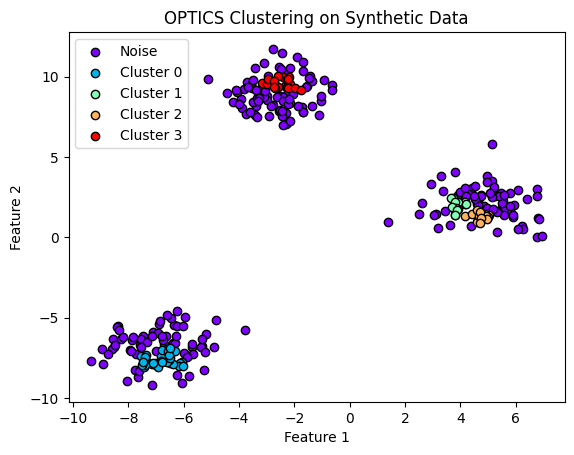

In [75]:
from sklearn.cluster import OPTICS
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=300, centers=3, random_state=42)
ops = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.05)
ops.fit(X)
labels = ops.labels_

# Replace -1 labels with a separate color index (e.g., max label + 1)
# Or assign color manually for -1 (noise)
unique_labels = np.unique(labels)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    class_member_mask = (labels == label)
    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], label=f'Cluster {label}' if label != -1 else 'Noise',
                c=[color], edgecolor='k')

plt.title("OPTICS Clustering on Synthetic Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [76]:
from sklearn.cluster import OPTICS
opt=OPTICS(min_samples=5,max_eps=np.inf,eps=None,predecessor_correction=True)
label=opt.fit_predict(x)

In [77]:
label

array([-1,  5,  8,  5, -1,  5,  8, -1,  8,  5,  8, -1,  8,  5,  8,  5,  0,
        5,  0, -1,  0,  5,  8,  5,  8, -1,  0, -1,  0, -1,  8,  5,  8, -1,
        8, -1, -1, -1, -1,  5, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1, -1,  2,  2, -1,  2, -1,  2,  2, -1, -1,  2,
       -1, -1,  2, -1,  3, -1,  4,  3,  4,  4, -1,  3,  3,  4,  3,  4,  3,
       -1, -1, -1,  4,  3,  3,  4,  3,  3, -1,  4,  3,  3,  3,  4, -1, -1,
       -1, -1, -1, -1, 10, -1,  9, -1, 10, -1,  9,  6,  9, -1,  9,  6, 10,
        6,  9,  6,  9,  6, 10, -1, 10, -1, 10, -1,  9, -1, 10, -1, 10, -1,
        9, -1, 10,  6,  9,  6,  9, -1,  9,  6, 10,  7, -1,  7, 10,  7, -1,
        7, -1,  7, 10,  7, 10,  7, -1,  7, -1, -1, -1,  7, -1, -1, -1,  7,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [78]:
supervised=dataset
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [79]:
supervised['Cluster_group']=label
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,-1
1,2,Male,21,15,81,5
2,3,Female,20,16,6,8
3,4,Female,23,16,77,5
4,5,Female,31,17,40,-1
...,...,...,...,...,...,...
195,196,Female,35,120,79,-1
196,197,Female,45,126,28,-1
197,198,Male,32,126,74,-1
198,199,Male,32,137,18,-1


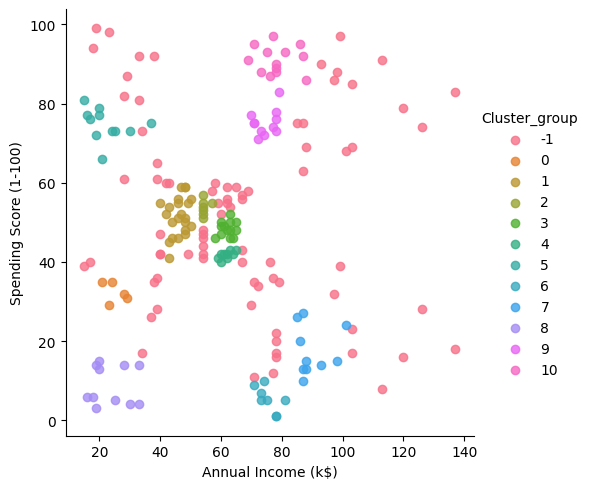

In [80]:
import seaborn as sns
facet=sns.lmplot(data=supervised,x=supervised.columns[3],y=supervised.columns[4],hue=supervised.columns[5],
                  fit_reg=False)